In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
path = 'kaggle/winemag-data_first150k.csv'

In [5]:
wine = pd.read_csv(path)

In [6]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
wine = wine.drop("Unnamed: 0",axis=1)

In [8]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
wine.shape

(150930, 10)

In [12]:
wine.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

## What countries are represented in the dataset?

In [10]:
wine.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'], dtype=object)

## What countries appear in the dataset most often?

In [11]:
wine.country.value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

## Which wine in is the "best bargain", e.g., which wine has the highest points-to-price ratio in the dataset?

In [49]:
wine["points_to_price"] = wine.points / wine.price

In [65]:
wine.loc[wine.points_to_price.argmax(axis=1)]

country                                                           US
description        There's a lot going on in this Merlot, which i...
designation                                                      NaN
points                                                            86
price                                                              4
province                                                  California
region_1                                                  California
region_2                                            California Other
variety                                                       Merlot
winery                                                        Bandit
points_to_price                                                 21.5
Name: 25645, dtype: object

## Is a wine more likely to be "tropical" or "fruity"? Create a Series counting how many times each of these two words appears in the description column in the dataset.

In [92]:
wines = wine[:20]

In [89]:
wine[wine.description.str.find("tropical") != -1].shape[0]

4135

In [90]:
wine[wine.description.str.find("fruity") != -1].shape[0]

8669

## What combination of countries and varieties are most common?

In [97]:
wine.points.isnull().any()

False

In [102]:
country_variety = wine.groupby(["country","variety"])[["points"]].count()

In [109]:
country_variety.columns = ["Count"]

In [110]:
country_variety.head()

Count
country   variety                          
Albania   Kallmet                         2
Argentina Barbera                         2
          Bonarda                       151
          Bordeaux-style Red Blend      106
          Bordeaux-style White Blend      3

In [114]:
country_variety.Count.sort_values(ascending=False).head()

country  variety                 
US       Pinot Noir                  10340
         Cabernet Sauvignon           9178
         Chardonnay                   8127
France   Bordeaux-style Red Blend     4960
US       Syrah                        4274
Name: Count, dtype: int64

## Who are the most common wine reviewers in the dataset?

In [119]:
wine.designation.unique().shape

(30622,)

In [123]:
reviewers = wine.groupby("designation")[["description"]].count()

In [125]:
reviewers.sort_values(by="description",ascending=False).head(10)

,description
designation,
Reserve,2752
Reserva,1810
Estate,1571
Barrel sample,1326
Riserva,754
Barrel Sample,639
Brut,624
Crianza,503
Estate Grown,449


##  What are the minimum and maximum prices for each variety of wine? 

In [126]:
wines.groupby("variety")["price"].agg(["min","max"])

,min,max
variety,,
Cabernet Sauvignon,235.0,325.0
Chardonnay,90.0,90.0
Friulano,80.0,80.0
Malbec,290.0,290.0
Pinot Noir,48.0,185.0
Provence red blend,66.0,66.0
Sauvignon Blanc,90.0,90.0
Tannat,90.0,90.0
Tempranillo,80.0,80.0


## Are there significant differences in the average scores assigned by the various reviewers? 

In [132]:
aver_points = wine.groupby("designation")[["points"]].mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f0f19a20>]], dtype=object)

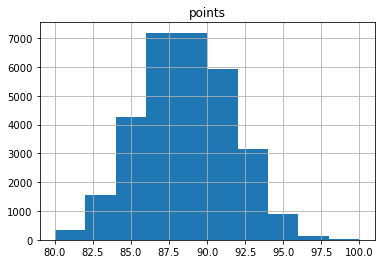

In [133]:
aver_points.hist()

In [134]:
aver_points.describe()

,points
count,30621.000000
mean,88.203448
std,3.017214
min,80.000000
25%,86.000000
50%,88.000000
75%,90.000000
max,100.000000


## What are the rarest, most expensive wine varieties?

In [144]:
variety_price = wine.groupby("variety")[["price"]].mean()

In [147]:
variety_price.sort_values("price",ascending=False).head()

,price
variety,
Cabernet-Shiraz,150.000000
Muscadel,141.300000
Mazuelo,98.500000
Tinto Fino,83.120000
Mission,82.571429


## What are the most common wine-producing regions?

In [149]:
wine.region_1 = wine.region_1.fillna("Unknown")

In [158]:
regions = pd.DataFrame(wine.groupby("region_1").size())
regions.columns = ["Count"]

In [161]:
regions.sort_values(by="Count",ascending=False).head()

,Count
region_1,
Unknown,25060
Napa Valley,6209
Columbia Valley (WA),4975
Mendoza,3586
Russian River Valley,3571
